In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
from datetime import datetime
import xlrd
df = pd.readf = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")
df.describe()

C:\Users\soomi\AppData\Local\Temp\ipykernel_9024\2554113127.py:7: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.readf = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")


,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [3]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
df.shape

(364558, 53)

In [5]:
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"


In [6]:
df1 = df.isnull().any()
df2 = pd.DataFrame(df1)
df2.columns = ['bd']

In [7]:
df2[df2["bd"] == True]

,bd
Closed Date,True
Descriptor,True
Location Type,True
Incident Zip,True
Incident Address,True
Street Name,True
Cross Street 1,True
Cross Street 2,True
Intersection Street 1,True
Intersection Street 2,True


In [8]:
df3 = df.replace("Unspecified", np.NaN)
df4 = df3.replace("N/A",np.NaN)
df5 = df4.dropna(axis=1, how='all')
for i in df5:
    print(i)
df5.shape

Unique Key
Created Date
Closed Date
Agency
Agency Name
Complaint Type
Descriptor
Location Type
Incident Zip
Incident Address
Street Name
Cross Street 1
Cross Street 2
Intersection Street 1
Intersection Street 2
Address Type
City
Landmark
Facility Type
Status
Due Date
Resolution Description
Resolution Action Updated Date
Community Board
Borough
X Coordinate (State Plane)
Y Coordinate (State Plane)
Park Facility Name
Park Borough
School Name
School Number
School Phone Number
School Address
School City
School State
School Not Found
Bridge Highway Name
Bridge Highway Direction
Road Ramp
Bridge Highway Segment
Ferry Direction
Ferry Terminal Name
Latitude
Longitude
Location


(364558, 45)

In [9]:
df5.shape

(364558, 45)

In [10]:
df5[df5["Created Date"] == 2015]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


In [11]:
df5.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [12]:
type(df5["Created Date"])

pandas.core.series.Series

In [13]:
df5["Created Date"]

0         12/31/2015 11:59:45 PM
1         12/31/2015 11:59:44 PM
2         12/31/2015 11:59:29 PM
3         12/31/2015 11:57:46 PM
4         12/31/2015 11:56:58 PM
                   ...          
364553    01/01/2015 12:04:44 AM
364554    01/01/2015 12:04:28 AM
364555    01/01/2015 12:01:30 AM
364556    01/01/2015 12:01:29 AM
364557    01/01/2015 12:00:50 AM
Name: Created Date, Length: 364558, dtype: object

In [14]:
input = '01/01/2015 12:04:44 AM'
format = '%m/%d/%Y %H:%M:%S %p'
df6 = []  
for i in df5["Created Date"]:
    j = datetime.strptime(i, format)
    df6.append(j)   
    


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
df5["Created Date"] = df6

C:\Users\soomi\AppData\Local\Temp\ipykernel_9024\1938657686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["Created Date"] = df6


In [17]:
 print(df5)

        Unique Key        Created Date             Closed Date Agency  \
0         32310363 2015-12-31 11:59:45  01/01/2016 12:55:15 AM   NYPD   
1         32309934 2015-12-31 11:59:44  01/01/2016 01:26:57 AM   NYPD   
2         32309159 2015-12-31 11:59:29  01/01/2016 04:51:03 AM   NYPD   
3         32305098 2015-12-31 11:57:46  01/01/2016 07:43:13 AM   NYPD   
4         32306529 2015-12-31 11:56:58  01/01/2016 03:24:42 AM   NYPD   
...            ...                 ...                     ...    ...   
364553    29609918 2015-01-01 12:04:44  01/01/2015 10:22:31 AM   NYPD   
364554    29608392 2015-01-01 12:04:28  01/01/2015 02:25:02 AM   NYPD   
364555    29607589 2015-01-01 12:01:30  01/01/2015 12:20:33 AM   NYPD   
364556    29610889 2015-01-01 12:01:29  01/01/2015 02:42:22 AM   NYPD   
364557    29611816 2015-01-01 12:00:50  01/01/2015 02:47:50 AM   NYPD   

                            Agency Name           Complaint Type  \
0       New York City Police Department  Noise - Street

In [18]:
print(type(df5["Created Date"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [19]:
df5.sort_values(by="Created Date")

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
364513,29612667,2015-01-01 01:00:16,01/01/2015 02:03:52 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11233.0,163 SUMPTER STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.680118,-73.918951,"(40.68011764450318, -73.91895111844362)"
364512,29613137,2015-01-01 01:00:33,01/01/2015 02:23:58 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11366.0,179-22 UNION TURNPIKE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.726821,-73.788425,"(40.72682141413409, -73.78842511564491)"
364511,29610588,2015-01-01 01:01:10,01/01/2015 04:21:05 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10465.0,2471 ROHR PLACE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.821745,-73.837199,"(40.821745275410386, -73.83719948450907)"
364510,29611033,2015-01-01 01:01:12,01/01/2015 01:31:45 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11236.0,691 ROCKAWAY PARKWAY,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.652452,-73.910454,"(40.65245220639163, -73.91045433555124)"
364218,29618293,2015-01-01 01:02:07,01/01/2015 03:32:47 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11355.0,43-20 UNION STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.754341,-73.821367,"(40.75434127135783, -73.82136735468637)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,32309367,2015-12-31 12:53:56,12/31/2015 01:48:46 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11368.0,45-05 102 STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.746248,-73.862376,"(40.74624839995756, -73.86237603030435)"
841,32302529,2015-12-31 12:54:43,12/31/2015 04:18:24 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10463.0,451 WEST 238 STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.887266,-73.904912,"(40.88726570260204, -73.90491204493418)"
464,32305100,2015-12-31 12:55:29,12/31/2015 02:55:29 PM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11230.0,1482 CONEY ISLAND AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.621339,-73.964533,"(40.62133924194742, -73.96453271991378)"
840,32299852,2015-12-31 12:56:22,12/31/2015 05:21:17 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)"


In [20]:
df7 = pd.DataFrame({"Created Date":df["Created Date"], 
                    "Closed Date":df["Closed Date"], 
                    "Due Date":df["Due Date"], 
                    "Resolution Action Updated Date":df["Resolution Action Updated Date"]})

In [21]:
df7

,Created Date,Closed Date,Due Date,Resolution Action Updated Date
0,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,01/01/2016 07:59:45 AM,01/01/2016 12:55:15 AM
1,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,01/01/2016 07:59:44 AM,01/01/2016 01:26:57 AM
2,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,01/01/2016 07:59:29 AM,01/01/2016 04:51:03 AM
3,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,01/01/2016 07:57:46 AM,01/01/2016 07:43:13 AM
4,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,01/01/2016 07:56:58 AM,01/01/2016 03:24:42 AM
...,...,...,...,...
364553,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,01/01/2015 08:04:44 AM,01/01/2015 10:22:31 AM
364554,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,01/01/2015 08:04:28 AM,01/01/2015 02:25:02 AM
364555,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,01/01/2015 08:01:30 AM,01/01/2015 12:20:33 AM
364556,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,01/01/2015 08:01:29 AM,01/01/2015 02:42:22 AM


In [22]:
df8 = df7.isnull().any()
df9 = pd.DataFrame(df8)
df9.columns = ['bd']
df9

,bd
Created Date,False
Closed Date,True
Due Date,True
Resolution Action Updated Date,True


In [23]:
l1 = df5["Closed Date"].isnull().sum() 
print(l1)
l2 = df7["Due Date"].isnull().sum() 
print(l2)
l3 = df7["Resolution Action Updated Date"].isnull().sum() 
print(l3)

2381
3
2402


In [24]:
l4 = np.where(df5["Closed Date"].isnull())[0]
l5 = np.where(df5["Due Date"].isnull())[0]
l6 = np.where(df5["Resolution Action Updated Date"].isnull())[0]

In [25]:
l7 = np.append(l4,l5)
l8 = np.append(l7,l6)
l9 = [*set(l8)]
print(len(l8))
print(len(l9))
print(l9)

4786
2420
[212992, 286726, 81927, 49162, 213003, 65551, 32784, 252040, 16420, 260524, 262187, 286767, 188477, 73793, 32834, 155724, 32851, 172122, 295003, 41064, 106602, 122999, 8317, 41089, 41090, 16521, 251975, 286866, 32916, 16533, 188571, 188584, 65706, 204973, 24750, 139439, 213169, 16564, 311479, 49336, 98489, 24776, 286921, 41173, 172248, 8411, 32990, 106720, 123117, 98548, 172277, 33018, 73978, 16646, 336140, 293135, 90397, 336161, 82211, 74033, 114997, 41274, 106814, 16703, 74052, 115012, 254299, 336219, 328032, 74084, 285011, 229740, 82289, 293154, 98679, 8574, 139655, 270728, 251977, 106892, 49554, 342007, 416, 74144, 115104, 25011, 90548, 106933, 270776, 270777, 229821, 270781, 82370, 123331, 33220, 74188, 106958, 82387, 115162, 33247, 279007, 180714, 254451, 311796, 82427, 262658, 311823, 311824, 156177, 221714, 25109, 25110, 25111, 262678, 25114, 25115, 311836, 164385, 49698, 270887, 172593, 197169, 205362, 74292, 107066, 287291, 8764, 139837, 74305, 311876, 25168, 57938,

In [26]:
 df5["Closed Date"][300]

'12/31/2015 09:23:57 PM'

In [27]:
df5["Closed Date"][416] 

nan

In [28]:
df5["Closed Date"][105995] 

nan

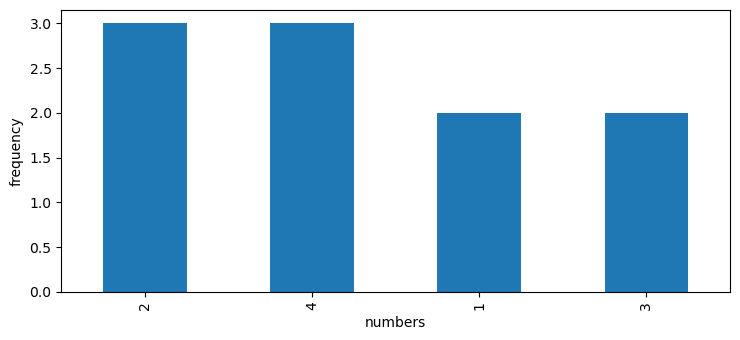

In [29]:
 from matplotlib import pyplot as plt
import pandas as pd

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df = pd.DataFrame({'numbers': [2, 4, 1, 4, 3, 2, 1, 3, 2, 4]})
df['numbers'].value_counts().plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency')

plt.show() 

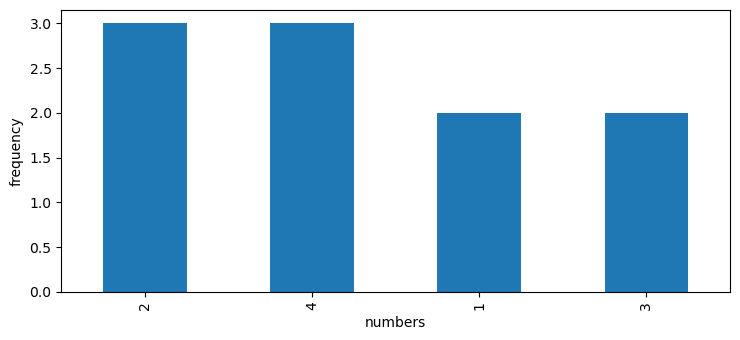

In [30]:
from matplotlib import pyplot as plt
import pandas as pd

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df = pd.DataFrame({'numbers': [2, 4, 1, 4, 3, 2, 1, 3, 2, 4]})
df['numbers'].value_counts().plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency')

plt.show()

In [31]:
df5.to_csv(r'C:\Users\soomi\anaconda3\Project\revised_data.csv',index=False, header=True)

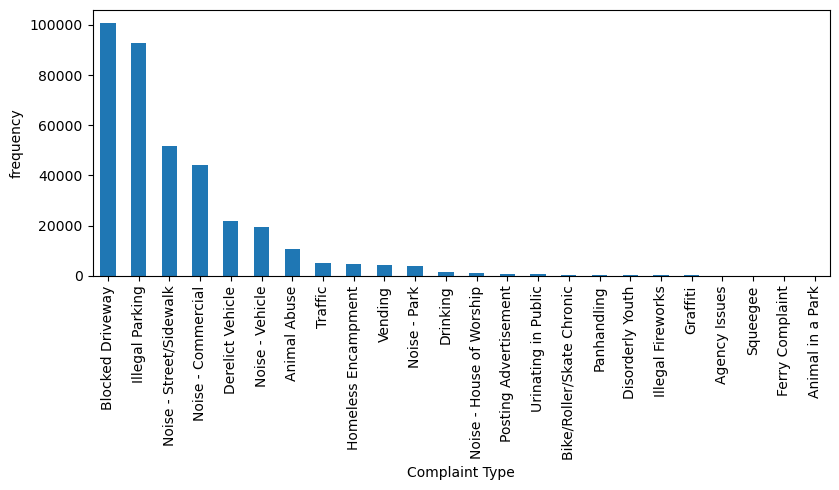

In [32]:
plt.rcParams["figure.figsize"] = [8.50, 5.00]
fig, ax = plt.subplots()
df_complaints = pd.DataFrame(df5['Complaint Type'])
df5['Complaint Type'].value_counts().plot(ax=ax, kind='bar', xlabel='Complaint Type', ylabel='frequency')
plt.show()



In [33]:
df5[['Complaint Type', 'City']]

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST
...,...,...
364553,Illegal Parking,WOODHAVEN
364554,Noise - Vehicle,BRONX
364555,Noise - Street/Sidewalk,NEW YORK
364556,Blocked Driveway,BRONX


In [34]:
df_Brooklyn = df5.loc[df5['City'] == 'BROOKLYN']
df_Brooklyn['Complaint Type']

5            Illegal Parking
9           Blocked Driveway
13           Illegal Parking
17        Noise - Commercial
18        Noise - Commercial
                 ...        
364539      Blocked Driveway
364541      Blocked Driveway
364544    Noise - Commercial
364545      Blocked Driveway
364546      Blocked Driveway
Name: Complaint Type, Length: 118862, dtype: object

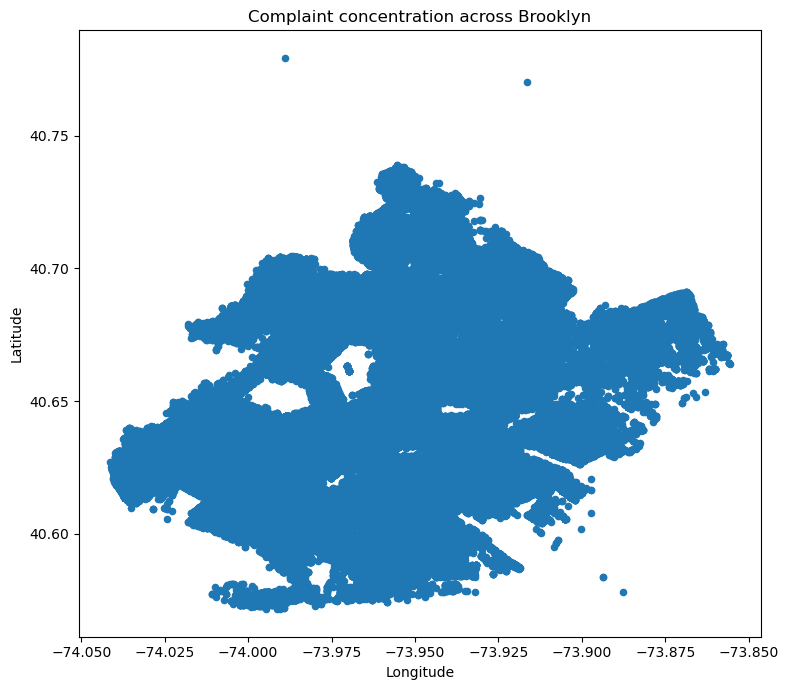

In [35]:
df_Brooklyn[['Longitude', 'Latitude']].plot(kind = 'scatter', x='Longitude', y='Latitude', title = 'Complaint concentration across Brooklyn', figsize = (8, 7));

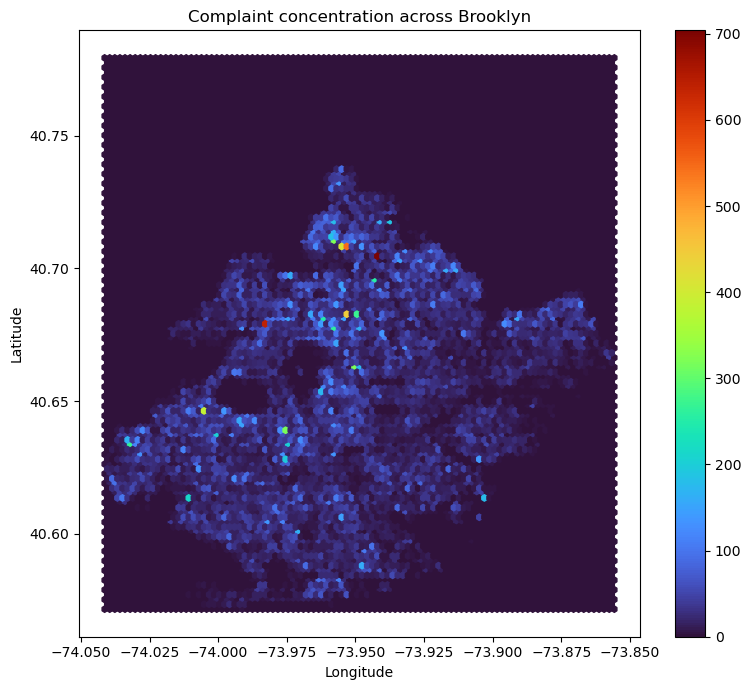

In [36]:
df_Brooklyn[['Longitude', 'Latitude']].plot(kind = 'hexbin', x='Longitude', y='Latitude',  colormap = 'turbo', title = 'Complaint concentration across Brooklyn', figsize = (8, 7));

<AxesSubplot:>

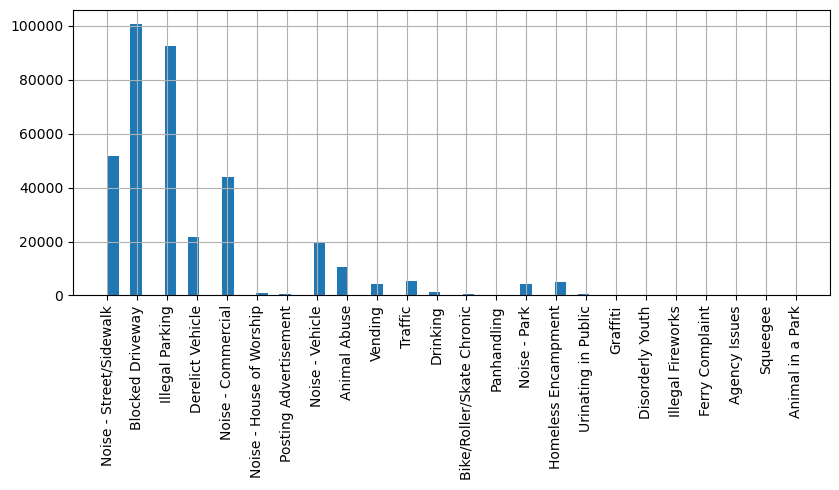

In [37]:
df_complaints = pd.DataFrame(df5['Complaint Type'])
plt.xticks(rotation='vertical')
df_complaints['Complaint Type'].hist(bins = 60)

In [38]:
count = df_complaints['Complaint Type'].value_counts().nlargest(10)
count

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

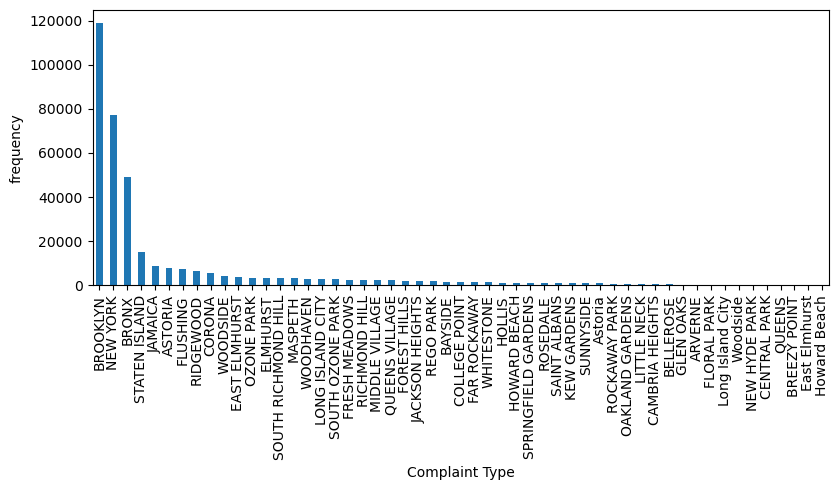

In [39]:
df7 = df5[['Complaint Type', 'City']]
df7 = pd.DataFrame(df7[['Complaint Type', 'City']])
count_complaintsbycity = pd.DataFrame({"City":df7['City'], "Complaint Type":df7['Complaint Type']})
plt.rcParams["figure.figsize"] = [8.50, 5.00]
fig, ax = plt.subplots()
count_complaintsbycity['City'].value_counts().plot(ax=ax, kind='bar', xlabel='Complaint Type', ylabel='frequency')
plt.show()

In [63]:
import datetime
resolutiontime = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", parse_dates=["Created Date", "Closed Date"])

C:\Users\soomi\AppData\Local\Temp\ipykernel_9024\2801019569.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  resolutiontime = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", parse_dates=["Created Date", "Closed Date"])


In [78]:
resolutiontime =resolutiontime.dropna(subset=["Closed Date"])
resolutiontime =resolutiontime.dropna(subset=["Created Date"])

resolutiontime["Request_Closing_Time"] = resolutiontime["Closed Date"] - resolutiontime["Created Date"]

In [79]:
np.mean(resolutiontime["Request_Closing_Time"])

Timedelta('0 days 04:11:53.299632500')